In [206]:
import pandas as pd
import numpy as np

In [245]:
data = pd.read_csv("airdata_updated.csv").drop(columns=['Unnamed: 0'])
data.head()

,datetime,CO,NO,PM10,PM2.5,SO2,temperature_2m,relative_humidity_2m,precipitation,pressure_msl,...,wind_x,wind_y,season_Fall,season_Spring,season_Summer,season_Winter,station_k12,station_k7,station_k8,station_k9
0,2023-04-01 02:00:00,200.406064,0.0,248.321723,NaN,31.540874,-4.3825,57.675350,0.0,1039.4,...,-1.699996,3.400002,0,1,0,0,True,False,False,False
1,2023-04-01 05:00:00,271.849180,0.0,NaN,NaN,48.657248,-5.1325,60.547020,0.0,1039.1,...,-1.699997,2.800002,0,1,0,0,True,False,False,False
2,2023-04-01 08:00:00,353.344343,0.0,NaN,NaN,39.866436,-3.8825,59.912790,0.0,1040.1,...,-1.200004,3.099999,0,1,0,0,True,False,False,False
3,2023-04-01 11:00:00,286.364430,0.0,NaN,NaN,31.369603,2.3175,37.652370,0.0,1039.2,...,-1.900000,4.300000,0,1,0,0,True,False,False,False
4,2023-04-01 14:00:00,227.553338,0.0,247.957699,NaN,48.619929,6.3175,26.806433,0.0,1037.3,...,-1.900009,5.299997,0,1,0,0,True,False,False,False


In [247]:
import pandas as pd

station_cols = ['station_k12', 'station_k7', 'station_k8', 'station_k9']

for col in station_cols:
    station_df = data[data[col] == 1]
    missing = station_df.isnull().sum().sum()
    print(f"{col}: {missing} missing values total")


station_k12: 1593 missing values total
station_k7: 0 missing values total
station_k8: 2 missing values total
station_k9: 19 missing values total


k7 will be used for further analysis with time series-related analysis

In [250]:
data.columns

Index(['datetime', 'CO', 'NO', 'PM10', 'PM2.5', 'SO2', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'pressure_msl',
       'wind_speed_10m', 'wind_direction_10m', 'cloud_cover', 'is_heating',
       'hour', 'day_of_week', 'month', 'wind_x', 'wind_y', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter', 'station_k12',
       'station_k7', 'station_k8', 'station_k9'],
      dtype='object')

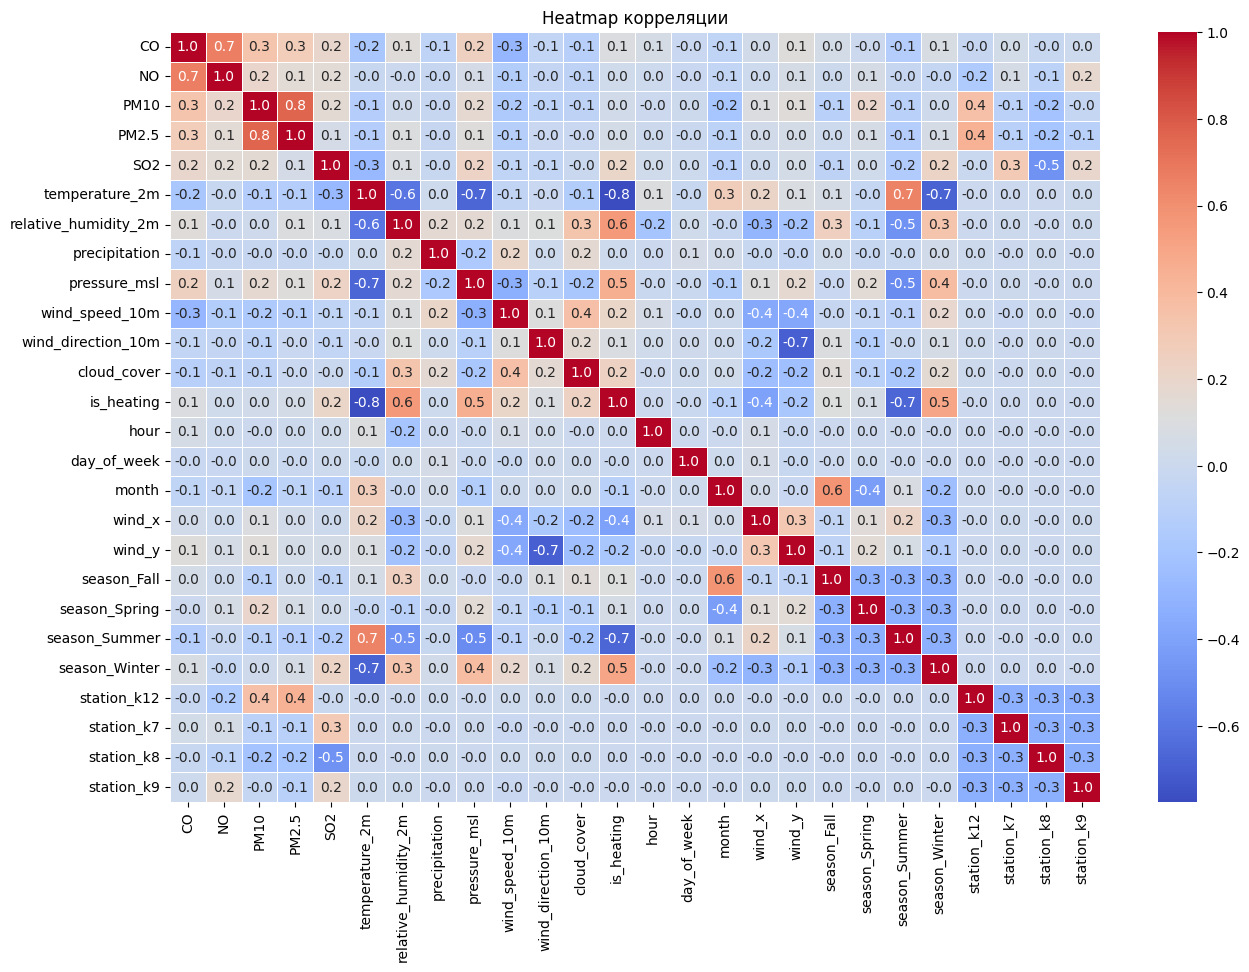

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.drop(columns=['datetime']).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title("Heatmap корреляции")
plt.show()

In [292]:
pollutants = ["CO", "NO", "PM10", "PM2.5", "SO2"]

common_cols = [
   "datetime", "temperature_2m", "relative_humidity_2m", "precipitation",
    "pressure_msl", "wind_speed_10m", "wind_direction_10m", "cloud_cover",
    "is_heating", "hour", "day_of_week", "wind_x", "wind_y",
    "station_k12", "station_k7", "station_k8", "station_k9", "month",
    "season_Fall", "season_Spring", "season_Summer", "season_Winter"
]


for pollutant in pollutants:
    selected_cols = common_cols + [pollutant]  
    data_pollutant = data[selected_cols].dropna() 
    data_pollutant.to_csv(f"upd_sep_targets/dataset_{pollutant}.csv", index=False)  
    print(f"Создан файл: dataset_{pollutant}.csv")


Создан файл: dataset_CO.csv
Создан файл: dataset_NO.csv
Создан файл: dataset_PM10.csv
Создан файл: dataset_PM2.5.csv
Создан файл: dataset_SO2.csv


In [270]:
data_co = pd.read_csv("upd_sep_targets/dataset_CO.csv")
data_no = pd.read_csv("upd_sep_targets/dataset_NO.csv")
data_pm10 = pd.read_csv("upd_sep_targets/dataset_PM10.csv")
data_pm25 = pd.read_csv("upd_sep_targets/dataset_PM2.5.csv")
data_so2 = pd.read_csv("upd_sep_targets/dataset_SO2.csv")
data_pm25.head()

,datetime,temperature_2m,relative_humidity_2m,precipitation,pressure_msl,wind_speed_10m,wind_direction_10m,cloud_cover,is_heating,hour,...,station_k12,station_k7,station_k8,station_k9,month,season_Fall,season_Spring,season_Summer,season_Winter,PM2.5
0,2023-05-17 17:00:00,20.967500,30.616327,0.0,1017.8,6.754258,64.573170,100.0,0,17,...,True,False,False,False,5,0,1,0,0,1.6
1,2023-05-17 20:00:00,17.417501,32.525402,0.0,1018.8,8.508819,60.422260,99.0,0,20,...,True,False,False,False,5,0,1,0,0,4.7
2,2023-05-17 23:00:00,12.767500,32.233590,0.0,1021.1,7.280110,74.054535,100.0,0,23,...,True,False,False,False,5,0,1,0,0,12.0
3,2023-05-18 02:00:00,10.617499,29.956306,0.0,1021.6,6.562012,82.116950,100.0,0,2,...,True,False,False,False,5,0,1,0,0,0.0
4,2023-05-18 05:00:00,9.567500,38.821903,0.0,1021.9,5.731492,83.991090,100.0,0,5,...,True,False,False,False,5,0,1,0,0,1.0


In [57]:
data_pm25.columns

Index(['datetime', 'temperature_2m', 'relative_humidity_2m', 'precipitation',
       'pressure_msl', 'wind_speed_10m', 'wind_direction_10m', 'cloud_cover',
       'is_heating', 'hour', 'day_of_week', 'wind_x', 'wind_y', 'station_k12',
       'station_k7', 'station_k8', 'station_k9', 'month', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter', 'PM2.5'],
      dtype='object')

C:\Users\ddame\AppData\Local\Temp\ipykernel_22156\1871295890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_col] = pd.to_datetime(df[time_col])
C:\Users\ddame\AppData\Local\Temp\ipykernel_22156\1871295890.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.set_index(time_col).resample(freq).mean().interpolate()



Top 5 detected cycles for CO:
Cycle #  Period (sec)    Period (hours)     Period (days)  
------------------------------------------------------------
1        31615200.00     8782.00            365.92         
2        86380.33        23.99              1.00           
3        3161520.00      878.20             36.59          
4        3512800.00      975.78             40.66          
5        554652.63       154.07             6.42           


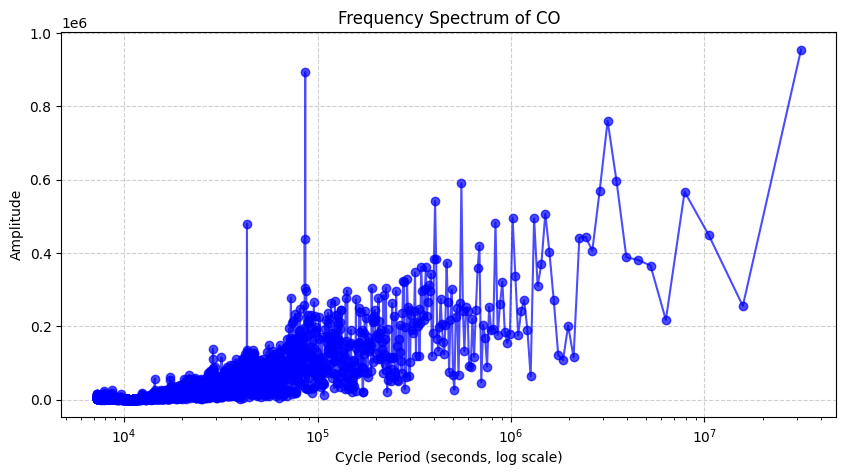

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

def preprocess_and_resample(df, time_col="datetime", freq="1H"):
    df[time_col] = pd.to_datetime(df[time_col])
    df = df.sort_values(by=time_col)  
    df = df.set_index(time_col).resample(freq).mean().interpolate()
    return df.reset_index()

def analyze_fft_cycles(df, pollutant, time_col="datetime", top_n=5):

    df = preprocess_and_resample(df, time_col)

    df["time_diff"] = (df[time_col] - df[time_col].min()).dt.total_seconds()

    time_steps = df["time_diff"].values
    signal = df[pollutant].values

    time_delta = np.median(np.diff(time_steps))
    if time_delta == 0:
        raise ValueError("Time delta is zero. Ensure the time column has distinct timestamps.")

    N = len(signal)
    fft_values = fft(signal)
    fft_freqs = fftfreq(N, d=time_delta)

    mask = fft_freqs > 0
    positive_freqs = fft_freqs[mask]
    positive_amplitudes = np.abs(fft_values[mask])

    sorted_indices = np.argsort(positive_amplitudes)[::-1] 
    top_cycles = 1 / positive_freqs[sorted_indices[:top_n]]  

    # Print top detected cycles
    print(f"\nTop {top_n} detected cycles for {pollutant}:")
    print(f"{'Cycle #':<8} {'Period (sec)':<15} {'Period (hours)':<18} {'Period (days)':<15}")
    print("-" * 60)
    for i, period in enumerate(top_cycles, start=1):
        print(f"{i:<8} {period:<15.2f} {period / 3600:<18.2f} {period / 86400:<15.2f}")

    plt.figure(figsize=(10, 5))
    plt.plot(1 / positive_freqs, positive_amplitudes, marker="o", linestyle="-", color="b", alpha=0.7)
    plt.xscale("log")
    plt.xlabel("Cycle Period (seconds, log scale)")
    plt.ylabel("Amplitude")
    plt.title(f"Frequency Spectrum of {pollutant}")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

analyze_fft_cycles(data_co[data_co['station_k7'] == True], "CO")


C:\Users\ddame\AppData\Local\Temp\ipykernel_22156\1871295890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_col] = pd.to_datetime(df[time_col])
C:\Users\ddame\AppData\Local\Temp\ipykernel_22156\1871295890.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.set_index(time_col).resample(freq).mean().interpolate()



Top 5 detected cycles for NO:
Cycle #  Period (sec)    Period (hours)     Period (days)  
------------------------------------------------------------
1        7903800.00      2195.50            91.48          
2        86380.33        23.99              1.00           
3        3161520.00      878.20             36.59          
4        43190.16        12.00              0.50           
5        831978.95       231.11             9.63           


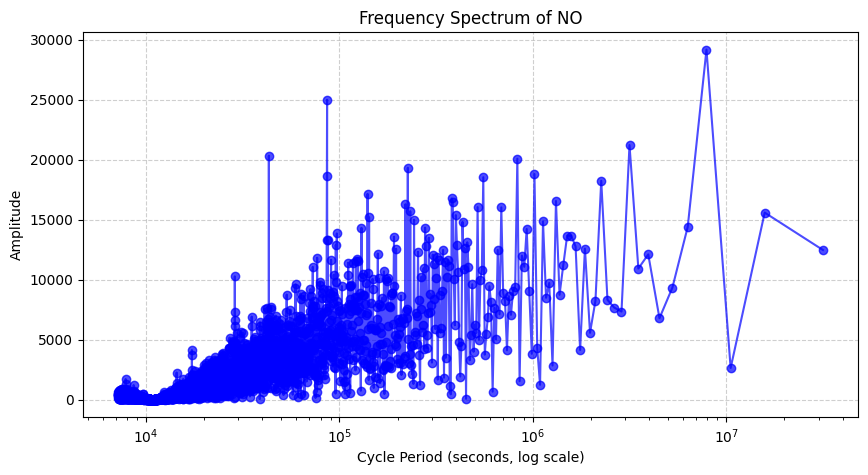

In [105]:
analyze_fft_cycles(data_no[data_no['station_k7'] == True], "NO")

C:\Users\ddame\AppData\Local\Temp\ipykernel_22156\1871295890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_col] = pd.to_datetime(df[time_col])
C:\Users\ddame\AppData\Local\Temp\ipykernel_22156\1871295890.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.set_index(time_col).resample(freq).mean().interpolate()



Top 5 detected cycles for PM10:
Cycle #  Period (sec)    Period (hours)     Period (days)  
------------------------------------------------------------
1        31615200.00     8782.00            365.92         
2        15807600.00     4391.00            182.96         
3        86380.33        23.99              1.00           
4        86144.96        23.93              1.00           
5        6323040.00      1756.40            73.18          


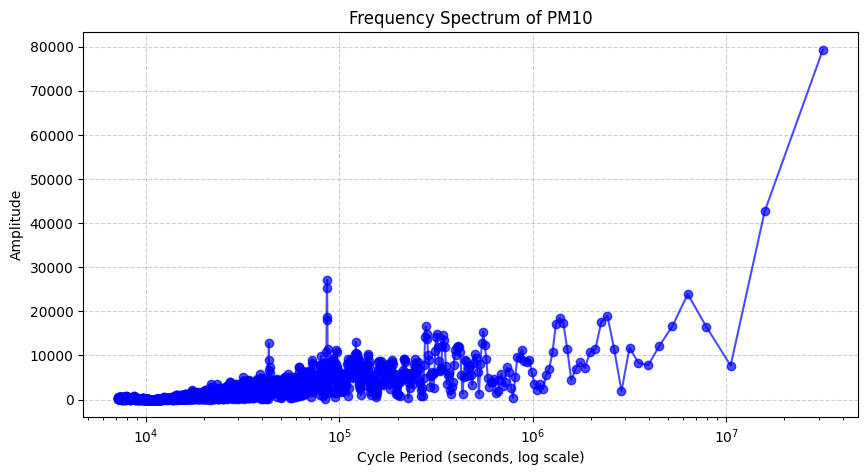

In [107]:
analyze_fft_cycles(data_pm10[data_pm10['station_k7'] == True], "PM10")

C:\Users\ddame\AppData\Local\Temp\ipykernel_22156\1871295890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_col] = pd.to_datetime(df[time_col])
C:\Users\ddame\AppData\Local\Temp\ipykernel_22156\1871295890.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.set_index(time_col).resample(freq).mean().interpolate()



Top 5 detected cycles for PM2.5:
Cycle #  Period (sec)    Period (hours)     Period (days)  
------------------------------------------------------------
1        31615200.00     8782.00            365.92         
2        15807600.00     4391.00            182.96         
3        10538400.00     2927.33            121.97         
4        7903800.00      2195.50            91.48          
5        86380.33        23.99              1.00           


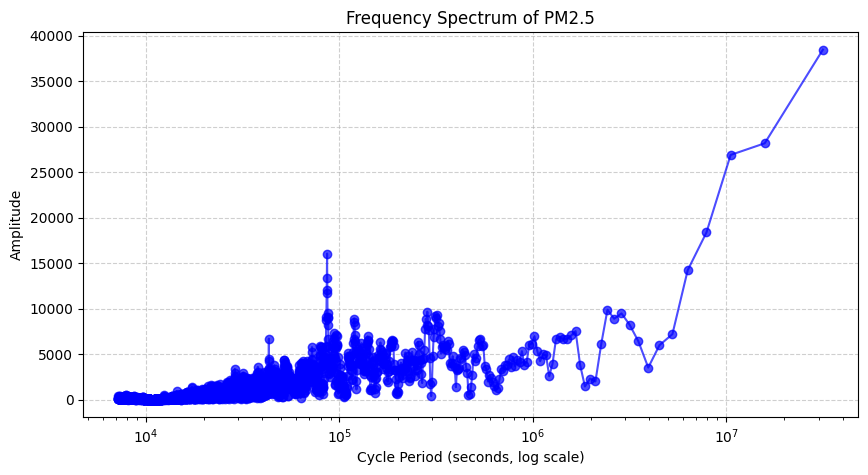

In [113]:
analyze_fft_cycles(data_pm25[data_pm25['station_k7'] == True], "PM2.5")

C:\Users\ddame\AppData\Local\Temp\ipykernel_22156\1871295890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[time_col] = pd.to_datetime(df[time_col])
C:\Users\ddame\AppData\Local\Temp\ipykernel_22156\1871295890.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.set_index(time_col).resample(freq).mean().interpolate()



Top 5 detected cycles for SO2:
Cycle #  Period (sec)    Period (hours)     Period (days)  
------------------------------------------------------------
1        31615200.00     8782.00            365.92         
2        15807600.00     4391.00            182.96         
3        2874109.09      798.36             33.27          
4        4516457.14      1254.57            52.27          
5        3512800.00      975.78             40.66          


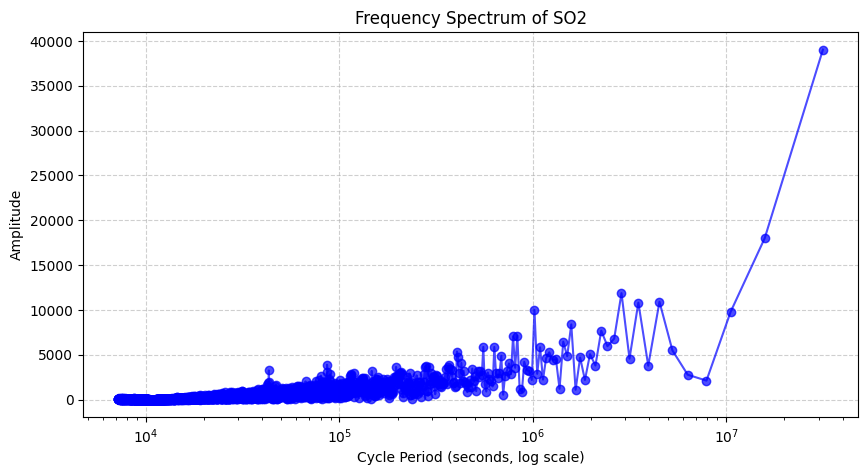

In [111]:
analyze_fft_cycles(data_so2[data_so2['station_k7'] == True], "SO2")

In [140]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

df = data[data['station_k7']==True].copy()
pollutants = ['CO', 'NO', 'PM10', 'PM2.5', 'SO2']  
weather_conditions = ['temperature_2m', 'relative_humidity_2m', 'precipitation', 'pressure_msl', 'wind_speed_10m', 'wind_direction_10m', 'cloud_cover']

results = []

def granger_test(df, var1, var2, max_lag=24):
    test_result = grangercausalitytests(df[[var1, var2]], maxlag=max_lag)
    p_values = {}
    for lag in range(1, max_lag+1):
        p_values[lag] = test_result[lag][0]['ssr_chi2test'][1]  # p-value для каждого лага
    return p_values

# Перебор всех пар полютантов и погодных условий
for pollutant in pollutants:
    for weather_condition in weather_conditions:
        p_values = granger_test(df, pollutant, weather_condition)
        for lag, p_value in p_values.items():
            results.append({
                'var1': pollutant,
                'var2': weather_condition,
                'lag': lag,
                'p_value': p_value
            })

for i in range(len(pollutants)):
    for j in range(i + 1, len(pollutants)):
        pollutant1 = pollutants[i]
        pollutant2 = pollutants[j]
        p_values = granger_test(df, pollutant1, pollutant2)
        for lag, p_value in p_values.items():
            results.append({
                'var1': pollutant1,
                'var2': pollutant2,
                'lag': lag,
                'p_value': p_value
            })

results_df = pd.DataFrame(results)

significant_results = results_df[results_df['p_value'] < 0.05]

print(significant_results)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.0263 , p=0.0000  , df_denom=2924, df_num=1
ssr based chi2 test:   chi2=28.0551 , p=0.0000  , df=1
likelihood ratio test: chi2=27.9215 , p=0.0000  , df=1
parameter F test:         F=28.0263 , p=0.0000  , df_denom=2924, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=55.3453 , p=0.0000  , df_denom=2921, df_num=2
ssr based chi2 test:   chi2=110.8800, p=0.0000  , df=2
likelihood ratio test: chi2=108.8308, p=0.0000  , df=2
parameter F test:         F=55.3453 , p=0.0000  , df_denom=2921, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=73.9089 , p=0.0000  , df_denom=2918, df_num=3
ssr based chi2 test:   chi2=222.2586, p=0.0000  , df=3
likelihood ratio test: chi2=214.2191, p=0.0000  , df=3
parameter F test:         F=73.9089 , p=0.0000  , df_denom=2918, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=59.6782 , p=0.

In [180]:
unique_pairs = set()
top_lags = []

for _, row in significant_results.iterrows():
    var1 = row['var1']
    var2 = row['var2']
    lag = row['lag']
    p_value = row['p_value']
    
    current_row = (var1, var2, lag, p_value)
    
    if (var1, var2) not in unique_pairs:
        unique_pairs.add((var1, var2))
        top_lags.append(current_row)
    else:
        existing_row = [r for r in top_lags if r[0] == var1 and r[1] == var2]
        
        if existing_row:
            existing_row = existing_row[0]
            if p_value < existing_row[3]:  # Сравниваем p-value
                top_lags.remove(existing_row)
                top_lags.append(current_row)

top_lags_df = pd.DataFrame(top_lags, columns=['var1', 'var2', 'lag', 'p_value'])

# Сортировка по var1
top_lags_df = top_lags_df.sort_values(by=['var1', 'p_value'])

print(top_lags_df)


     var1                  var2  lag       p_value
0      CO        temperature_2m    4  1.218895e-50
1      CO  relative_humidity_2m    5  4.922545e-30
31     CO                    NO    9  8.694875e-29
2      CO          pressure_msl    3  2.013264e-27
3      CO        wind_speed_10m   22  3.325413e-15
34     CO                   SO2    4  3.335286e-12
33     CO                 PM2.5    4  1.758174e-08
32     CO                  PM10    4  3.619046e-07
5      CO           cloud_cover    1  4.279236e-05
4      CO    wind_direction_10m    2  2.418093e-04
6      NO        temperature_2m    5  5.212637e-23
7      NO  relative_humidity_2m    5  1.839503e-16
36     NO                 PM2.5    9  1.225376e-15
9      NO        wind_speed_10m    1  1.262771e-12
8      NO          pressure_msl   11  1.914296e-12
37     NO                   SO2   11  3.631820e-10
35     NO                  PM10    4  2.099333e-08
11     NO           cloud_cover    1  4.542710e-06
10     NO    wind_direction_10m

In [272]:
pollutant_data = {}

for _, row in top_lags_df.iterrows():
    var1 = row['var1']
    var2 = row['var2']
    lag = row['lag']
    
    for _, row in top_lags_df.iterrows():
        var1 = row['var1']
        var2 = row['var2']
        lag = row['lag']
        
        if var1 == 'CO':
            data_co[f'{var2}_lag_{lag}'] = data[var2].shift(lag)
        elif var1 == 'NO':
            data_no[f'{var2}_lag_{lag}'] = data[var2].shift(lag)
        elif var1 == 'PM10':
            data_pm10[f'{var2}_lag_{lag}'] = data[var2].shift(lag)
        elif var1 == 'PM2.5':
            data_pm25[f'{var2}_lag_{lag}'] = data[var2].shift(lag)
        elif var1 == 'SO2':
            data_so2[f'{var2}_lag_{lag}'] = data[var2].shift(lag)

In [278]:
fft_lags_dict = {
    'CO':    [1, 6],
    'NO':    [0.5, 1, 9],
    'PM10':  [1],
    'PM2.5': [1],
    'SO2':   [6]
}

dataframes = {
    'CO': data_co,
    'NO': data_no,
    'PM10': data_pm10,
    'PM2.5': data_pm25,
    'SO2': data_so2
}

for pollutant, lags in fft_lags_dict.items():
    for lag in lags:
        colname = f'{pollutant}_lag_{lag}'
        dataframes[pollutant][colname] = data[pollutant].shift(int(lag*24/3)) #lags in days, whereas dt is 3 hours


In [282]:
data_pm25

,datetime,temperature_2m,relative_humidity_2m,precipitation,pressure_msl,wind_speed_10m,wind_direction_10m,cloud_cover,is_heating,hour,...,season_Winter,PM2.5,relative_humidity_2m_lag_2,temperature_2m_lag_4,SO2_lag_1,wind_speed_10m_lag_22,cloud_cover_lag_4,wind_direction_10m_lag_11,pressure_msl_lag_12,PM2.5_lag_1
0,2023-05-17 17:00:00,20.967500,30.616327,0.0,1017.8,6.754258,64.573170,100.0,0,17,...,0,1.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-17 20:00:00,17.417501,32.525402,0.0,1018.8,8.508819,60.422260,99.0,0,20,...,0,4.700000,NaN,NaN,31.540874,NaN,NaN,NaN,NaN,NaN
2,2023-05-17 23:00:00,12.767500,32.233590,0.0,1021.1,7.280110,74.054535,100.0,0,23,...,0,12.000000,57.67535,NaN,48.657248,NaN,NaN,NaN,NaN,NaN
3,2023-05-18 02:00:00,10.617499,29.956306,0.0,1021.6,6.562012,82.116950,100.0,0,2,...,0,0.000000,60.54702,NaN,39.866436,NaN,NaN,NaN,NaN,NaN
4,2023-05-18 05:00:00,9.567500,38.821903,0.0,1021.9,5.731492,83.991090,100.0,0,5,...,0,1.000000,59.91279,-4.3825,31.369603,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,2024-03-31 11:00:00,0.463000,65.595850,0.0,1029.0,4.517743,242.300610,12.0,1,11,...,0,8.044611,73.70928,-14.3870,31.710222,2.009975,24.0,123.11135,1043.3,1.060000
11160,2024-03-31 14:00:00,4.713000,53.500020,0.0,1029.1,4.085339,248.458950,16.0,1,14,...,0,4.519889,72.16826,-17.4870,27.766667,1.664332,100.0,144.16226,1043.9,0.475222
11161,2024-03-31 17:00:00,6.563000,45.845260,0.0,1029.1,4.742362,245.056120,4.0,1,17,...,0,8.955000,70.41076,-19.5870,38.916333,1.216552,27.0,158.62932,1043.0,0.597111
11162,2024-03-31 20:00:00,-0.437000,83.206430,0.0,1031.5,4.101220,224.999900,2.0,1,20,...,0,4.433944,71.66897,-17.7370,32.606556,2.202272,100.0,159.14546,1042.0,2.096667


In [298]:
data_co.to_csv('upd_sep_targets_with_lags/dataset_CO_with_lags.csv')
data_no.to_csv('upd_sep_targets_with_lags/dataset_NO_with_lags.csv')
data_pm25.to_csv('upd_sep_targets_with_lags/dataset_PM2.5_with_lags.csv')
data_pm10.to_csv('upd_sep_targets_with_lags/dataset_PM10_with_lags.csv')
data_so2.to_csv('upd_sep_targets_with_lags/dataset_SO2_with_lags.csv')